In [1]:
# Paso 1: Importar las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Paso 2: Cargar el archivo y convertirlo en un DataFrame
filename = 'data/sales_predictions.csv'
df = pd.read_csv(filename)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Se identifica la dimensión del DataFrame obtenido
df.shape

(8523, 12)

In [4]:
# Se obtiene información del Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# De la información anterior, podemos ver que el dataset cuenta con 8523 registros y 12 columnas
# De la consulta df.info, podemos ver que no todas las columnas tienen 8523 registros
# Identificamos la cantidad de valores nulos
df.isna().sum()[df.isna().sum()>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [6]:
# Agrupamos por el peso promedio de cada item
# Como cada item tiene su ID (Item Identifier), asumimos que cada uno tiene su peso en particular
df.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [7]:
# Almacenamos los datos agrupados anteriormente en una variable
pesos_promedios = df.groupby('Item_Identifier')['Item_Weight'].mean()

In [8]:
# Generamos un diccionario que contiene los pesos promedios asociados a cada item
dict_pesos_promedios = pesos_promedios.to_dict()

In [9]:
# Generamos una lista para identificar cuales items tienen valores de peso faltantes
lista_na = []
for i in range(len(df)):
  if pd.isna(df.at[i, 'Item_Weight']) == True:
    lista_na.append(df.at[i, 'Item_Identifier'])
lista_na;

In [10]:
# Fitramos por un Item Identifier con valores de Item_Weight faltante para usarlo como prueba
df[df['Item_Identifier'] == 'FDH31']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5850,FDH31,12.0,Regular,0.020443,Meat,98.0042,OUT049,1999,Medium,Tier 1,Supermarket Type1,1587.2672
5894,FDH31,NaN,Regular,0.000000,Meat,98.2042,OUT019,1985,Small,Tier 1,Grocery Store,198.4084
6282,FDH31,12.0,Regular,0.020411,Meat,98.6042,OUT046,1997,Small,Tier 1,Supermarket Type1,1091.2462
6985,FDH31,NaN,Regular,0.020312,Meat,98.1042,OUT027,1985,Medium,Tier 3,Supermarket Type3,2777.7176
8513,FDH31,12.0,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252


In [11]:
# Recorremos el Data Frame y reemplazamos el valor faltante por el peso promedio segun el item identifier
for i in range(len(df)):
  if pd.isna(df.at[i, 'Item_Weight']) == True:
    df.at[i,'Item_Weight']=dict_pesos_promedios[df.at[i, 'Item_Identifier']]

In [12]:
# Revisamos si cambiaron los valores faltantes de la columna Item_Weight para el Item_Identifier de prueba
df[df['Item_Identifier'] == 'FDH31']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5850,FDH31,12.0,Regular,0.020443,Meat,98.0042,OUT049,1999,Medium,Tier 1,Supermarket Type1,1587.2672
5894,FDH31,12.0,Regular,0.000000,Meat,98.2042,OUT019,1985,Small,Tier 1,Grocery Store,198.4084
6282,FDH31,12.0,Regular,0.020411,Meat,98.6042,OUT046,1997,Small,Tier 1,Supermarket Type1,1091.2462
6985,FDH31,12.0,Regular,0.020312,Meat,98.1042,OUT027,1985,Medium,Tier 3,Supermarket Type3,2777.7176
8513,FDH31,12.0,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252


In [13]:
# Revisamos la lista nuevamente. Si no se completaron con los valores de los promedios calculados,
# quiere decir que son items únicos y que no tienen peso registrado
list_na=[]
for i in range(len(df)):
  if pd.isna(df.at[i, 'Item_Weight']) == True:
    list_na.append(df.at[i, 'Item_Identifier'])
list_na

['FDN52', 'FDK57', 'FDE52', 'FDQ60']

In [14]:
# Generamos una lista con los índices de estos Item Identifier con Item Weight NaN
eliminar = []
for i in list_na:
  x = ((df[df['Item_Identifier'] == i]).index.to_list())[0]
  eliminar.append(x)
eliminar

[927, 1922, 4187, 5022]

In [15]:
# Chequeamos si los índices son correctos
df_unicos = df[(df['Item_Identifier'] == 'FDN52')| (df['Item_Identifier'] == 'FDK57')| (df['Item_Identifier'] == 'FDE52')| (df['Item_Identifier'] == 'FDQ60')]

In [16]:
df_unicos

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [17]:
#Analizaremos cual es el total de ventas de los diferentes outlets y cuanto afecta en particular
# estos items dentro de el total de ventas del Outlet 027 y el Outlet 019
(df.groupby(['Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size'])['Item_Outlet_Sales']).sum().sort_values(ascending=False)

Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size
OUT027             1985                       Medium         3.453926e+06
OUT035             2004                       Small          2.268123e+06
OUT049             1999                       Medium         2.183970e+06
OUT013             1987                       High           2.142664e+06
OUT046             1997                       Small          2.118395e+06
OUT018             2009                       Medium         1.851823e+06
OUT019             1985                       Small          1.796941e+05
Name: Item_Outlet_Sales, dtype: float64

In [18]:
# Quitamos la notación científica del resultado y almacenamos en una variable
ventas_outlet = (df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales']).sum().apply(lambda x: '%.2f' % x)

In [19]:
ventas_outlet.sort_values(ascending=False)

Outlet_Identifier
OUT027    3453926.05
OUT035    2268122.94
OUT049    2183969.81
OUT017    2167465.29
OUT013    2142663.58
OUT046    2118395.17
OUT045    2036725.48
OUT010     188340.17
OUT018    1851822.83
OUT019     179694.09
Name: Item_Outlet_Sales, dtype: object

In [20]:
suma_OUT027 =df_unicos.loc[927,'Item_Outlet_Sales']+df_unicos.loc[1922,'Item_Outlet_Sales']+df_unicos.loc[4187,'Item_Outlet_Sales']

print('El aporte de estos items en el total de ventas de la tienda OUT027 es de:',suma_OUT027/float(ventas_outlet['OUT027']))
print('El aporte de este item en el total de ventas de la tienda OUT019 es de:',df_unicos.loc[5022,'Item_Outlet_Sales']/float(ventas_outlet['OUT019']))

El aporte de estos items en el total de ventas de la tienda OUT027 es de: 0.0027382430495291005
El aporte de este item en el total de ventas de la tienda OUT019 es de: 0.000670638639256305


In [21]:
# Eliminamos esta filas de nuestro Data Frame
# Se toma esta decisión ya que no tenemos nada que haga referencia a los pesos de estos productos y además porque
# su aporte al total de ventas del Outlet es pequeño
for i in eliminar:
  df=df.drop(i)

In [22]:
# Reseteamos los índices para que no hayan saltos de números
df.reset_index(drop=True, inplace=True)

In [23]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8514,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8515,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8516,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8517,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [24]:
# Nuevamente, revisamos la cantidad de filas y columnas que tiene el DataFrame
df.shape

(8519, 12)

In [25]:
# Vemos como cambió la cantidad de elementos NaN
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
# Ahora continuamos con los Outlet Size con valores faltantes.
# Aplicamos el mismo supuesto anterior, el de completar con el valor correspondiente al Outlet Identifier
(df.groupby(['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size']).describe()

,,,count,unique,top,freq
Outlet_Identifier,Outlet_Type,Outlet_Location_Type,,,,
OUT010,Grocery Store,Tier 3,0,0,NaN,NaN
OUT013,Supermarket Type1,Tier 3,932,1,High,932
OUT017,Supermarket Type1,Tier 2,0,0,NaN,NaN
OUT018,Supermarket Type2,Tier 3,928,1,Medium,928
OUT019,Grocery Store,Tier 1,527,1,Small,527
OUT027,Supermarket Type3,Tier 3,932,1,Medium,932
OUT035,Supermarket Type1,Tier 2,930,1,Small,930
OUT045,Supermarket Type1,Tier 2,0,0,NaN,NaN
OUT046,Supermarket Type1,Tier 1,930,1,Small,930


In [27]:
# Recorremos el Data Frame y reemplazamos el valor faltante por el tamañoo segun el outler identifier
# Según la agrupación anterior, el unico antecedente del tamaño de un grocery store es small
# Según la agrupación anterior, tenemos la coincidencia de que existen datos de que Supermarket Type1 en Tier 2
# es small, por lo que usaremos este supuesto tambien para completar lo datos faltantes
for i in range(len(df)):
  if pd.isna(df.at[i, 'Outlet_Size']) == True:
    if df.at[i, 'Outlet_Type'] == 'Grocery Store':
      df.at[i, 'Outlet_Size'] = 'Small'
    elif (df.at[i, 'Outlet_Type'] == 'Supermarket Type1'):
      df.at[i,'Outlet_Size']= 'Small'

In [28]:
(df.groupby(['Outlet_Identifier', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Establishment_Year'])['Outlet_Size']).describe()

,,,,count,unique,top,freq
Outlet_Identifier,Outlet_Type,Outlet_Location_Type,Outlet_Establishment_Year,,,,
OUT010,Grocery Store,Tier 3,1998,555,1,Small,555
OUT013,Supermarket Type1,Tier 3,1987,932,1,High,932
OUT017,Supermarket Type1,Tier 2,2007,926,1,Small,926
OUT018,Supermarket Type2,Tier 3,2009,928,1,Medium,928
OUT019,Grocery Store,Tier 1,1985,527,1,Small,527
OUT027,Supermarket Type3,Tier 3,1985,932,1,Medium,932
OUT035,Supermarket Type1,Tier 2,2004,930,1,Small,930
OUT045,Supermarket Type1,Tier 2,2002,929,1,Small,929
OUT046,Supermarket Type1,Tier 1,1997,930,1,Small,930


In [29]:
# Revisamos si quedan valores nulos
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [30]:
# Revisamos si en las columnas que tienen datos categóricos si hay que hacer alguna modificacion

print('*'*50)
print(df['Item_Identifier'].value_counts())
print('*'*50)
print(df['Item_Fat_Content'].value_counts())
print('*'*50)
print(df['Item_Type'].value_counts())
print('*'*50)
print(df['Outlet_Identifier'].value_counts())
print('*'*50)
print(df['Outlet_Size'].value_counts())
print('*'*50)
print(df['Outlet_Location_Type'].value_counts())
print('*'*50)
print(df['Outlet_Type'].value_counts())

**************************************************
FDG33    10
FDW13    10
FDV60     9
FDU12     9
FDX20     9
         ..
DRF48     1
FDY43     1
FDC23     1
FDO33     1
FDT35     1
Name: Item_Identifier, Length: 1555, dtype: int64
**************************************************
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
**************************************************
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
**************************************

In [31]:
# Corregiremos los valores de Item_Fat_Content
# Low Fat = LF y low fat
# Regular = reg
for i in range(len(df)):
    if (df.loc[i, 'Item_Fat_Content'] == 'LF') | (df.loc[i, 'Item_Fat_Content'] == 'low fat')  :
      df.loc[i, 'Item_Fat_Content'] = 'Low Fat'
    elif (df.loc[i, 'Item_Fat_Content'] == 'reg'):
      df.loc[i,'Item_Fat_Content']= 'Regular'

print(df['Item_Fat_Content'].value_counts())

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64


### Analisis Exploratorio de los Datos

A continuación se presentan algunos gráficos, que nos pueden ayudar a entender como diferentes características del dataset pueden contribuir a las ventas

In [32]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


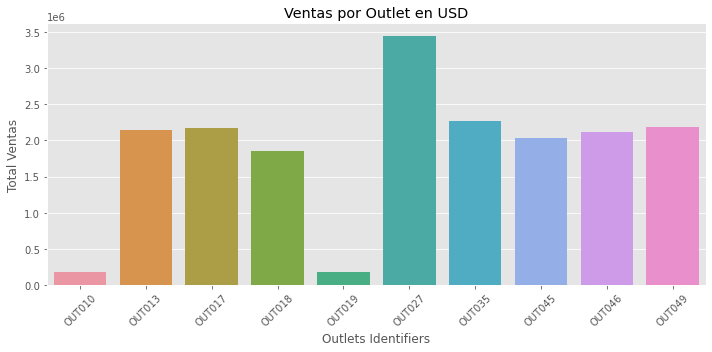

In [33]:
# Graficamos
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title('Ventas por Outlet en USD')
sns.barplot(x= df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().index, y = df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum().values)
plt.xticks(rotation = 45)
plt.ylabel('Total Ventas')
plt.xlabel('Outlets Identifiers')
plt.tight_layout()
plt.savefig('images/VentasPorOutlet.png', dpi = 300);

Tal como vimos anteriormente, la tienda que más ventas genera es OUT027

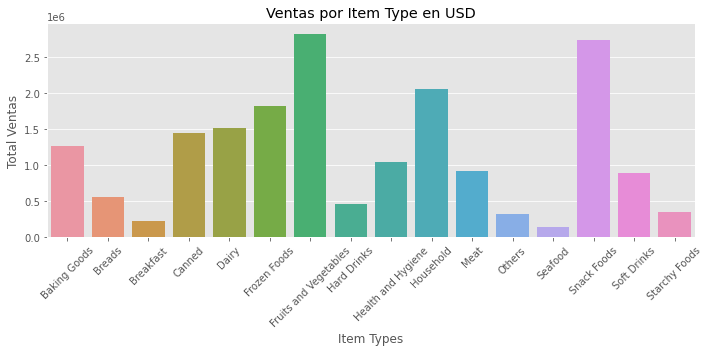

In [34]:
# Graficamos
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title('Ventas por Item Type en USD')
sns.barplot(x= df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().index, y = df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum().values)
plt.xticks(rotation = 45)
plt.ylabel('Total Ventas')
plt.xlabel('Item Types')
plt.tight_layout()
plt.savefig('images/VentarPorTipoItem.png', dpi = 300);

A nivel global de tiendas, lo que concentra la mayoría de las ventas son los Snacks y la comida congelada

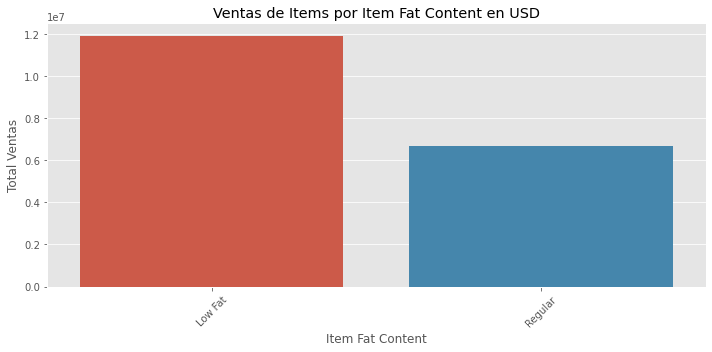

In [35]:
# Graficamos
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.title('Ventas de Items por Item Fat Content en USD')
sns.barplot(x= df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum().index, y = df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum().values)
plt.xticks(rotation = 45)
plt.ylabel('Total Ventas')
plt.xlabel('Item Fat Content')
plt.savefig('images/VentasPorContenidoGrasa.png', dpi = 300)
plt.tight_layout();

Por otro lado, los productos bajos en grasa concentran mayor cantidad de ventas que los productos regulares, a nivel global de todas las tiendas.

### Histogramas y Box-Plots

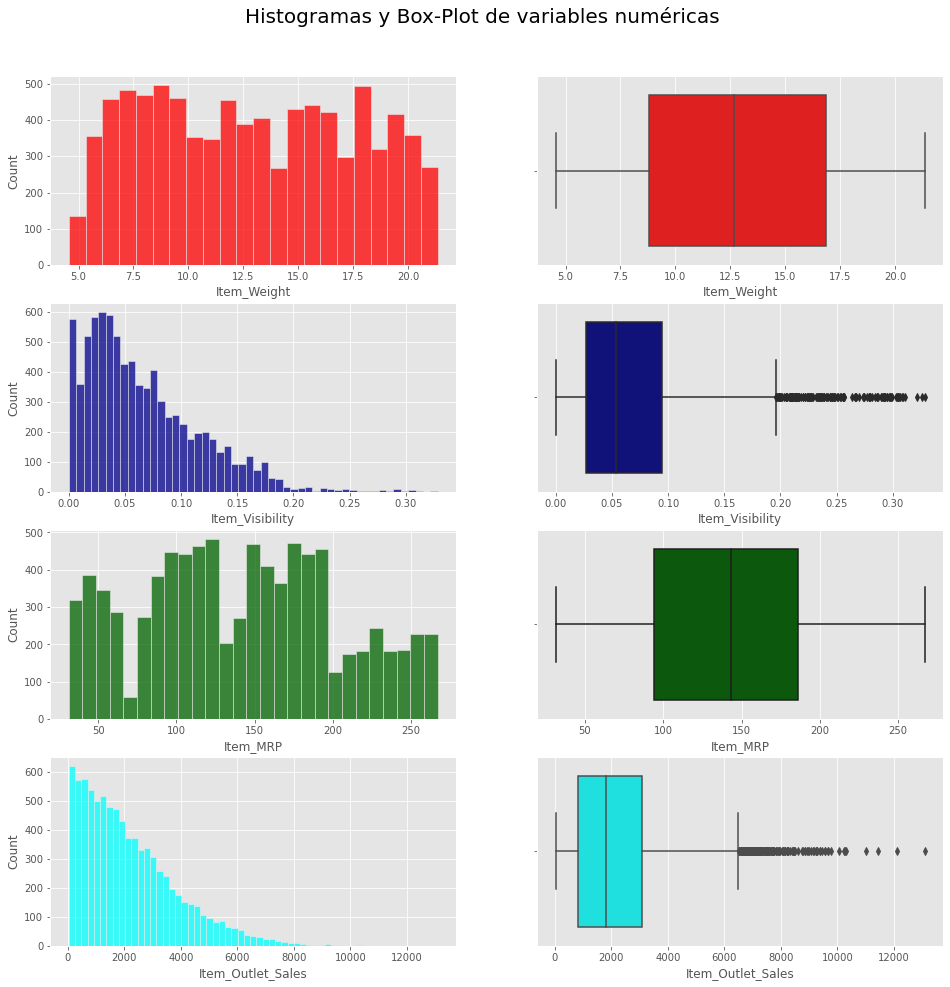

In [36]:
fig, axs = plt.subplots(4, 2, figsize=(16, 16))
plt.suptitle('Histogramas y Box-Plot de variables numéricas', size=20, y=0.94)
sns.histplot(data=df, x="Item_Weight", ax=axs[0,0], color='red')
sns.boxplot(data=df, x="Item_Weight", ax=axs[0,1], color='red')
sns.histplot(data=df, x="Item_Visibility", color='darkblue', ax=axs[1, 0])
sns.boxplot(data=df, x="Item_Visibility", color='darkblue', ax=axs[1, 1])
sns.histplot(data=df, x="Item_MRP", color='darkgreen' , ax=axs[2, 0])
sns.boxplot(data=df, x="Item_MRP", color='darkgreen' , ax=axs[2, 1])
sns.histplot(data=df, x="Item_Outlet_Sales", color='cyan', ax=axs[3, 0])
sns.boxplot(data=df, x="Item_Outlet_Sales", color='cyan', ax=axs[3, 1])
plt.savefig('images/HistogramasYBoxplots.png', dpi = 300);


De los anteriores histogramas y boxplot se puede ver que Item_Visibility como Item_Outlet_Sales son sesgadas y presentan outliers que serían interesantes de tratar a futuro, identificando las medianas de estos datos y viendo con la ayuda de un experto en tema si corresponde el reemplazo de estos puntos outliers por la mediana de estos.

El resto de las características analizadas no presentan outliers y se distrubiyen de una forma que podría considerarse normal.

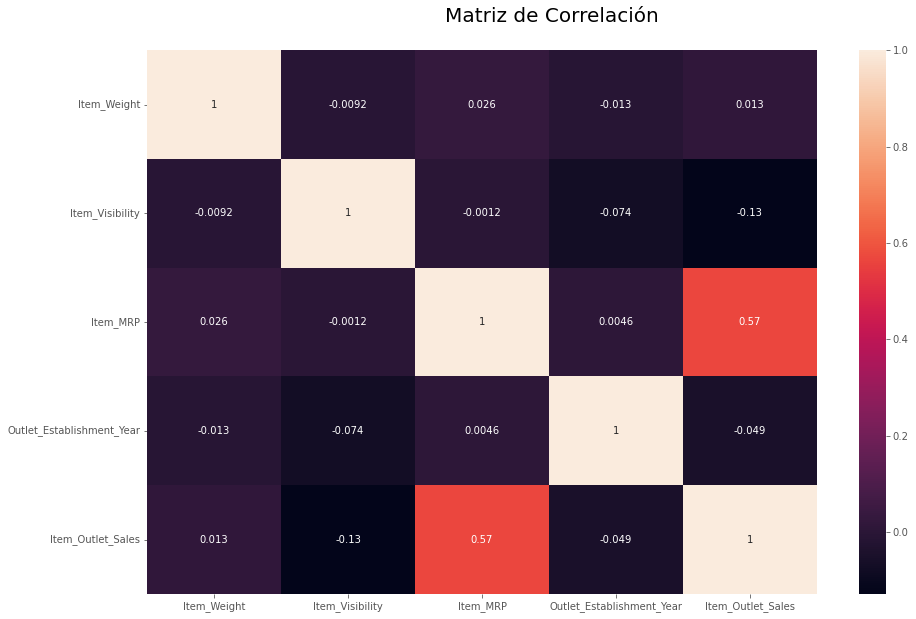

In [37]:
plt.figure(figsize=(15,10))
plt.suptitle('Matriz de Correlación', size=20, y=0.94)
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.savefig('images/Correlacion1.png', dpi = 300)

Con la matriz de correlación anterior, a priori podemos ver que la correlación más significativa es Item_MRP con Item_Outlet_Sales, que es de 0.57. Esto en todo caso, este valor representa solamente una relación lineal moderada entre ambas variables

### Modelos de Regresion

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [39]:
# Transformamos las características de categorías en numéricas
#Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type

le = LabelEncoder()
df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])


In [40]:
# Vemos como quedó el DataFrame.
# Se observa que las columnas que contenían valores categoricos, ahora tienen valores numéricos
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,660,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1117,19.200,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1293,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8514,369,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8515,893,8.380,1,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8516,1353,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8517,679,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [41]:
# Generamos la matriz de características y el vector objetivo

X = df.loc[:, df.columns != 'Item_Outlet_Sales']

In [42]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2
2,660,17.500,0,0.016760,10,141.6180,9,1999,1,0,1
3,1117,19.200,1,0.000000,6,182.0950,0,1998,2,2,0
4,1293,8.930,0,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8514,369,6.865,0,0.056783,13,214.5218,1,1987,0,2,1
8515,893,8.380,1,0.046982,0,108.1570,7,2002,2,1,1
8516,1353,10.600,0,0.035186,8,85.1224,6,2004,2,1,1
8517,679,7.210,1,0.145221,13,103.1332,3,2009,1,2,2


In [43]:
y = df.loc[:, df.columns == 'Item_Outlet_Sales']
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8514,2778.3834
8515,549.2850
8516,1193.1136
8517,1845.5976


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [45]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Revisemos como queda la matriz de correlación ahora, con los datos ya escalados

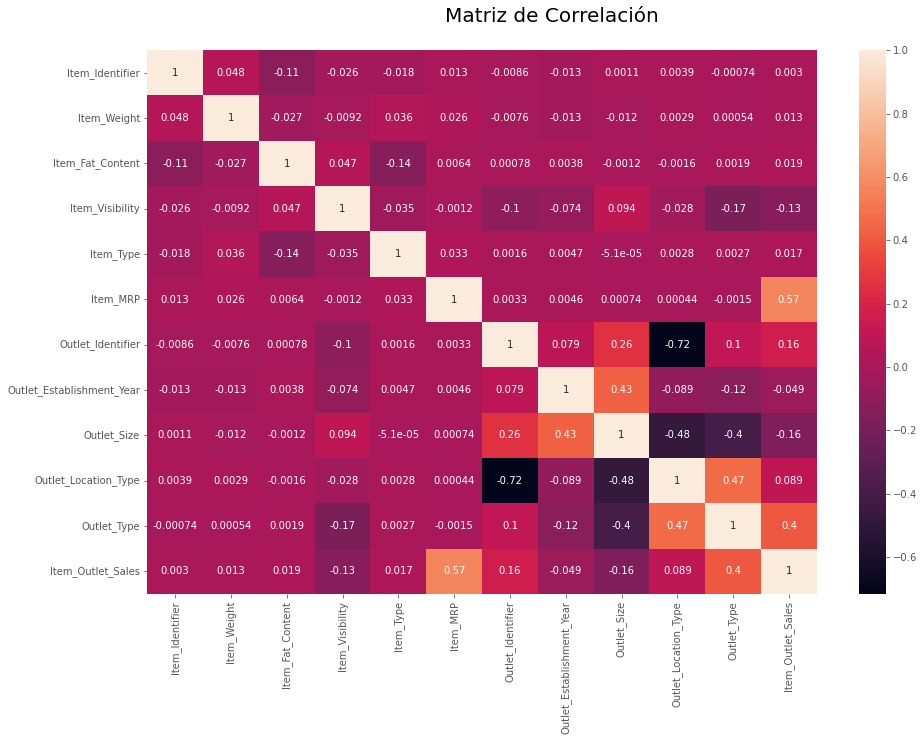

In [46]:
plt.figure(figsize=(15,10))
plt.suptitle('Matriz de Correlación', size=20, y=0.94)
sns.heatmap(df.corr(), annot=True, cmap='rocket')
plt.savefig('images/Correlacion2.png', dpi = 300);

### 1. Regresion Lineal

In [47]:
# Generamos un modelo de regresión lineal y calculamos sus métricas
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train,y_train)
lr_score = lr.score(X_test, y_test)
print('El valor de R2 es de:', lr_score)
lr_rmse = mean_squared_error(y_test, lr.predict(X_test), squared=False)
print('El valor de la raíz del error cuadrático medio es de:',lr_rmse)

El valor de R2 es de: 0.5130816294613008
El valor de la raíz del error cuadrático medio es de: 1188.404770606179


### 2. KNN Regresor

In [48]:
# Ahora probaremos con un modelo de KNN Regresor
# Primero vamos a buscar el K que minimice el RMSE
lista_rmse = []
for k in range (1,11):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train, y_train)
    y_pred = knr.predict(X_test)
    knr_rmse = mean_squared_error(y_test, y_pred, squared=False)
    lista_rmse.append(knr_rmse)

Graficamos lo obtenido

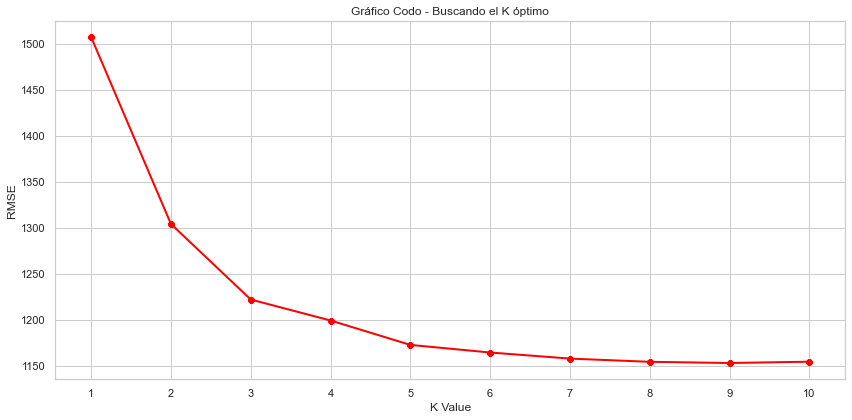

In [49]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(12,6))
plt.plot(range(1,11),lista_rmse, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("RMSE")
plt.title('Gráfico Codo - Buscando el K óptimo')
plt.tight_layout()
plt.savefig('images/KNNCodo.png', dpi = 300)
plt.show()

In [50]:
# Utilizamos como K=5
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
knr_rmse = mean_squared_error(y_test, y_pred, squared=False)
knr_score = knr.score(X_test, y_test)
print('El valor de R2 es de:', knr_score)
print('El valor de la raíz del error cuadrático medio es de:',knr_rmse)

El valor de R2 es de: 0.525739231270131
El valor de la raíz del error cuadrático medio es de: 1172.8565753994637


### 3. Random Forest Regresor

In [51]:
# Rango de Estimadores
estimator_range = [1]+list(range(10, 110, 10))

In [52]:
# Buscamos la cantidad de estimadores que maximice el puntaje de modelo
scores = []
for estimator in estimator_range:
    rf = RandomForestRegressor(n_estimators=estimator,
                                 random_state=3)
    rf.fit(X_train, y_train.values)
    scores.append(rf.score(X_test, y_test.values))

/var/folders/pm/hdckrf6d34b6c4hr6x6gnp1m0000gn/T/ipykernel_7191/2822960996.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train.values)
/var/folders/pm/hdckrf6d34b6c4hr6x6gnp1m0000gn/T/ipykernel_7191/2822960996.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train.values)
/var/folders/pm/hdckrf6d34b6c4hr6x6gnp1m0000gn/T/ipykernel_7191/2822960996.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train.values)
/var/folders/pm/hdckrf6d34b6c4hr6x6gnp1m0000gn/T/ipykernel_7191/2822960996.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [53]:
scores

[0.1758550647682312,
 0.535179377668026,
 0.5431415086686977,
 0.549984725707916,
 0.5539758600069827,
 0.5556114413460059,
 0.5567776228697339,
 0.5563829030505261,
 0.55746319242863,
 0.5581409585522701,
 0.55911696642048]

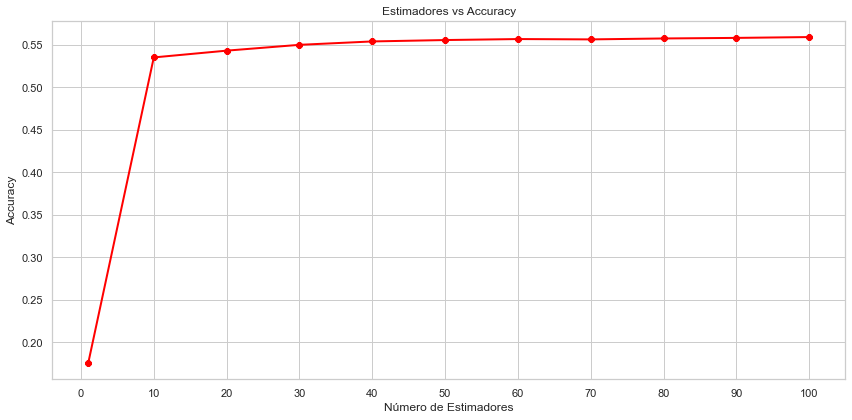

In [54]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(12,6))
plt.plot(estimator_range, scores, linewidth=2, color="red", marker ="8")
plt.xlabel("Número de Estimadores")
plt.xticks(np.arange(0,110,10))
plt.ylabel("Accuracy")
plt.title('Estimadores vs Accuracy')
plt.tight_layout()
plt.savefig('images/RandomForestEstimadores.png', dpi = 300)
plt.show()

In [55]:
# Utilizaremos número de estimadores = 100, que es el valor que viene por defecto
rf = RandomForestRegressor(n_estimators=100, bootstrap=True, oob_score=True, random_state=3)

In [56]:
rf.fit(X_train, y_train)

/var/folders/pm/hdckrf6d34b6c4hr6x6gnp1m0000gn/T/ipykernel_7191/2725846524.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(oob_score=True, random_state=3)

In [57]:
rf.predict(X_test)

array([ 550.976132,  956.042194, 1936.266244, ..., 1612.421124,
        200.086216, 1298.816008])

In [58]:
rf_score = rf.score(X_test, y_test)
rf_rmse = lr_rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
print('El valor de R2 es de:', rf_score)
print('El valor de la raíz del error cuadrático medio es de:',rf_rmse)

El valor de R2 es de: 0.55911696642048
El valor de la raíz del error cuadrático medio es de: 1130.8317659532577


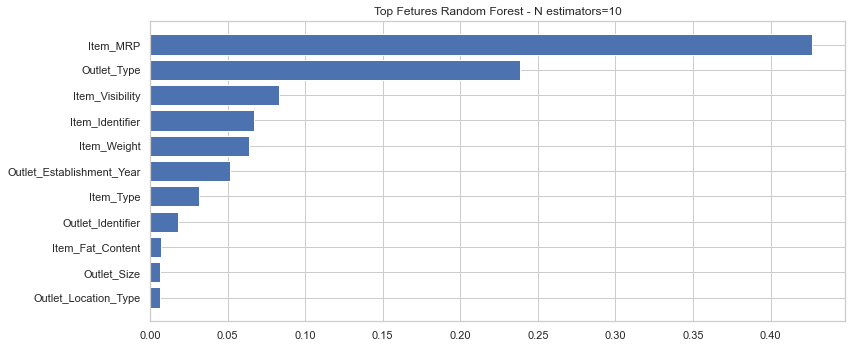

In [59]:
rf_fi= pd.DataFrame(zip(X.columns, rf.feature_importances_), columns=['Feature', 'Scores'])
rf_fi.sort_values(by='Scores', inplace=True)

plt.figure(figsize=(12,5))
plt.barh(rf_fi['Feature'], rf_fi['Scores'])
plt.title('Top Fetures Random Forest - N estimators=10')
plt.savefig('images/TopFeatures.png', dpi = 300)
plt.tight_layout();

### Resumen

In [60]:
indice = ['Regresion Lineal',
          'KNN Regresor',
          'Random Forest Regresor']
indicadores = {'R2' : [lr_score, knr_score, rf_score],
                'RMSE': [lr_rmse, knr_rmse, rf_rmse]
                }
resumen = pd.DataFrame(indicadores, index=indice)
resumen

,R2,RMSE
Regresion Lineal,0.513082,1130.831766
KNN Regresor,0.525739,1172.856575
Random Forest Regresor,0.559117,1130.831766


Revisando los indicadores anteriores, el modelo que mejor se ajusta a los datos es Random Forest Regresor.
Este modelo tiene un R2 de 0.559, lo que quiere decir que aproximadamente 56% de la variación de las ventas de items por tienda puede ser explicado por las características utilizadas en este modelo. Por otro lado, en promedio, este modelo es incorrecto en aproximadamentes 1130 USD por venta de items por tienda.

Si bien es el mejor modelo obtenido hasta este momento, no quiere decir que no se pueda mejorar.
Para ello sería importante consultar a un experto, si efectivamente es necesario utilizar todas las caracteristicas indicadas en el ser de datos, o bien se pueden omitir algunas que quizas no aporten nada al modelo.